# Results plots
Script for plotting all the results of the integration to check what happened
## Table of Contents <a class="anchor" id="top"></a>
* [Temperature and flux](#temp)
* [Core central temperature](#Tc)
* [Inner core size and Rem](#ic)
* [Rayleigh number](#rayleigh)
* [Stagnant lid thickness](#stagnant)
* [CMB mantle boundary layer thickness](#cmb-bl)
* [Sulfur fraction in liquid core](#sulfur)
* [Initial temp profiles](#Tprofile-initial)
* [Temperature profiles with time](#Tprofile-time)

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#scale time to Myr
from parameters import Myr, r, Tm0, dr

Choose your run and whether you want to save your figures

In [2]:
run=57
conduction = False # does the mantle switch to conduction?
save = False # do you want to save your figures?

Import data from npz file

In [3]:
npzfile = np.load('Results/run_{}.npz'.format(run))
Tc= npzfile['Tc'] 
Tc_conv = npzfile['Tc_conv']
Tcmb = npzfile['Tcmb']
Tm_mid = npzfile['Tm_mid']
Tm_conv = npzfile['Tm_conv']
Tm_surf = npzfile['Tm_surf'] 
T_profile = npzfile['T_profile']
f = npzfile['f'] 

t = npzfile['t'] #time in s
Rem1 = npzfile['Rem1'] # magnetic Reynolds number from compositional (Nimmo) and thermal convection (whatever is larger at each time step)
Rem2 = npzfile['Rem2'] # magnetic Reynolds number from compositional (Nichols) and thermal convection (whatever is larger at each time step)
Flux = npzfile['Flux']
Ra = npzfile['Ra'] 
d0 = npzfile['d0'] 
Xs = npzfile['Xs']
dl = npzfile['dl']
dx = npzfile['dc']
Fs = Flux[0]
Fcmb = Flux[1]
Fad = Flux[2]
Frad = Flux[3]

Scale time to Myr

In [4]:
t_plot = t/Myr

Import label info - read in from correct row in csv. If using run_info3.csv need to remember there is an extra Tsolidus column

In [5]:
run_info = pd.read_csv('run_info4.csv',delimiter=',')

row = run_info[run_info['run']==run]
r = row.iloc[0,1] #radius [m]
Tm0 = row.iloc[0,2] # initial mantle and core temp [K]
tstart = row.iloc[0,3]
tend = row.iloc[0,4] # max possible time of simulation [Myr]
tstep = row.iloc[0,5] #max timestep [Myr]
tsolid = row.iloc[0,6] #time at which solidifcation finishes [Myr] if tsolid == tend then core may not have finished solidifying
cond_i= row.iloc[0,7] #index in array at which mantle started conducting

if conduction == True:
    cond_i = int(cond_i)
    cond_t = t[cond_i]/Myr #time at which mantle switched to conduction
    
dr=row.iloc[0,9] #cell spacing
dt =row.iloc[0,10] #T_profile output frequency
viscosity = row.iloc[0,11] #viscosity profile

## Temperature and Flux Plot <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

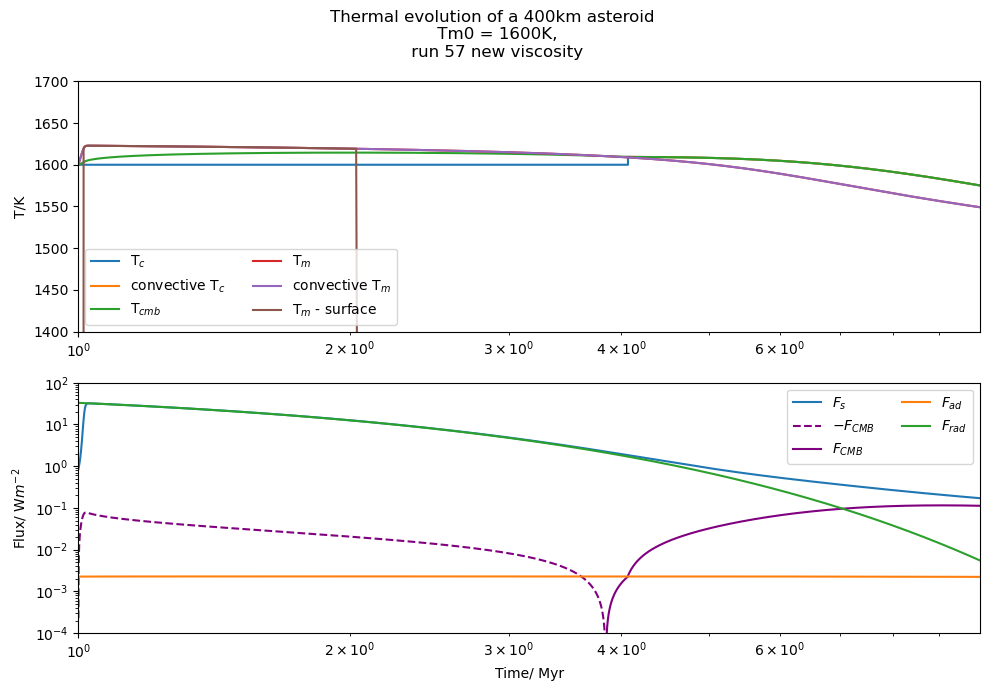

In [6]:
plt.figure(tight_layout=True,figsize=[10,7])
plt.suptitle('Thermal evolution of a {:.0f}km asteroid \n Tm0 = {}K,\n run {} new viscosity'.format(r/1e3, Tm0, run))

xmin=tstart
log_time = True
#temperatures as function of time
plt.subplot(2,1,1)
if log_time == True:
    plt.semilogx(t_plot,Tc,label='T$_c$')
    plt.semilogx(t_plot[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.semilogx(t_plot,Tcmb,label='T$_{cmb}$')
    plt.semilogx(t_plot,Tm_mid,label='T$_m$')
    plt.semilogx(t_plot[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    plt.semilogx(t_plot,Tm_surf,label='T$_m$ - surface')
else:
    plt.plot(t_plot,Tc,label='T$_c$')
    plt.plot(t_plot[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.plot(t_plot,Tcmb,label='T$_{cmb}$')
    plt.plot(t_plot,Tm_mid,label='T$_m$')
    plt.plot(t_plot[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    plt.plot(t_plot,Tm_surf,label='T$_m$ - surface')
if conduction == True:
    plt.vlines(cond_t,ymin=min(Tm_surf),ymax=1600,color='black',linestyle='--',label='conduction')
plt.xlim([xmin,max(t_plot)])
plt.ylim([1400,1700]) #use these limits when comparing runs
plt.ylabel('T/K')
plt.legend(loc='lower left', ncol= 2)

#fluxes as function of time
plt.subplot(2,1,2)

Fcmb_neg = Fcmb[Fcmb<0]
Fcmb_pos = Fcmb[Fcmb>0]
if log_time == True:
    plt.loglog(t_plot,Fs,label='$F_s$')
    plt.loglog(t_plot[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',linestyle='dashed',color='purple')
    plt.loglog(t_plot[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='purple')
    plt.loglog(t_plot,Fad,label='$F_{ad}$')
    plt.loglog(t_plot,Frad,label='$F_{rad}$')
else:
    plt.semilogy(t_plot,Fs,label='$F_s$')
    plt.semilogy(t_plot[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',linestyle='dashed',color='purple')
    plt.semilogy(t_plot[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='purple')
    plt.semilogy(t_plot,Fad,label='$F_{ad}$')
    plt.semilogy(t_plot,Frad,label='$F_{rad}$')
plt.xlabel('Time/ Myr')

plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.xlim([xmin,max(t_plot)])
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)


if save == True:
    plt.savefig('Plots/run_{}_Tflux.png'.format(run),dpi=450)

## Core central temperature <a class="anchor" id="Tc"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Text(0, 0.5, 'T/K')

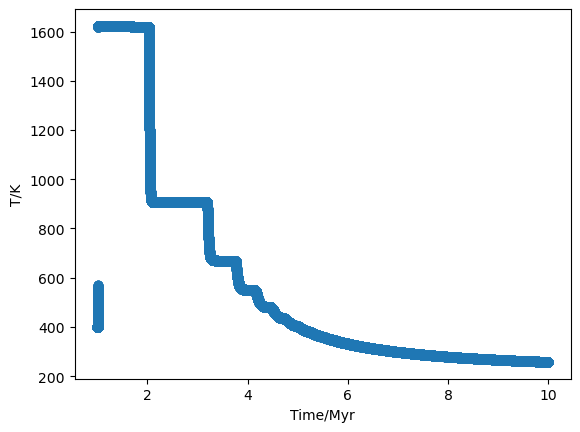

In [7]:
plt.figure()
plt.scatter(t_plot,Tm_surf)
#plt.xlim([5.9,6])
plt.xlabel('Time/Myr')
plt.ylabel('T/K')

## Magnetic Reynolds number and inner core size <a class="anchor" id="ic"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

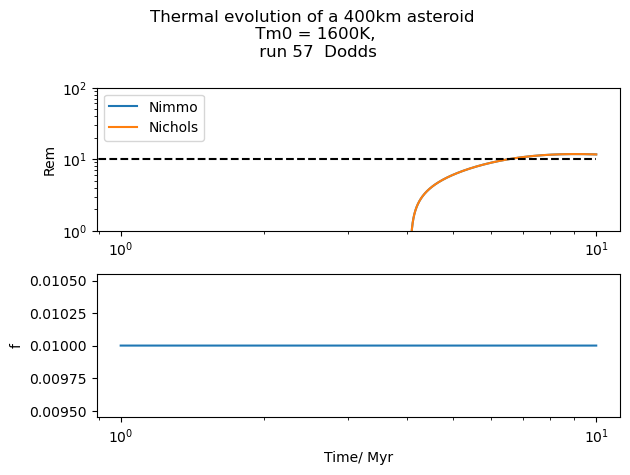

In [8]:
plt.figure(tight_layout=True)
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n Tm0 = {Tm0}K, \n run {run}  {viscosity}')
plt.subplot(2,1,1)
plt.loglog(t_plot,Rem1,label='Nimmo')
plt.loglog(t_plot,Rem2,label='Nichols')
plt.hlines(10,xmin=0,xmax=t_plot[len(Rem1)-1],color='k',linestyle='--')
#plt.xlabel('Time/Myr')
plt.ylabel('Rem')
plt.legend(loc='upper left')
plt.ylim([1,100])

plt.subplot(2,1,2)
plt.semilogx(t_plot,f,label='f')
plt.xlabel('Time/ Myr')
plt.ylabel('f')

if save == True:
    plt.savefig('Plots/run_{}_Remf.png'.format(run),dpi=450)

## Rayleigh number<a class="anchor" id="rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

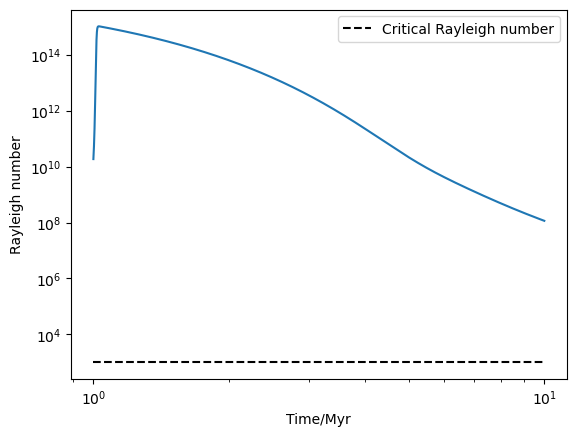

In [9]:
plt.figure()
if conduction == True:
    plt.loglog(t_plot[:cond_i],Ra[:cond_i])
    plt.hlines(1000,min(t_plot),max(t_plot[:cond_i]),color='k',linestyle='--',label='Critical Rayleigh number')
else:
    plt.loglog(t_plot,Ra)
    plt.hlines(1000,min(t_plot),max(t_plot),color='k',linestyle='--',label='Critical Rayleigh number')
plt.xlabel('Time/Myr')
plt.ylabel('Rayleigh number')
plt.legend()

if save == True:
    plt.savefig('Plots/run_{}_Rayleigh.png'.format(run))

## Stagnant lid thickness <a class="anchor" id="stagnant"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

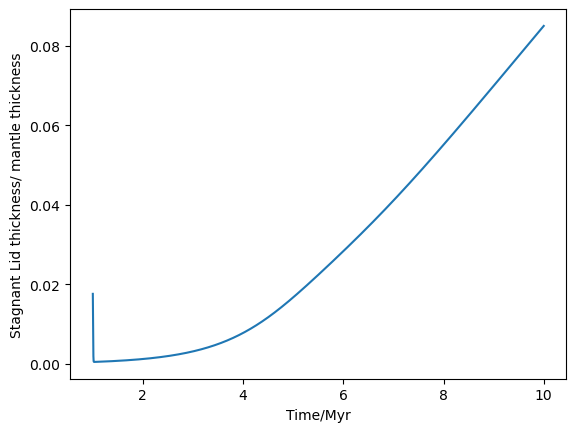

In [10]:
plt.figure()

if conduction == True:
    plt.plot(t_plot[:cond_i],2*d0[:cond_i]/r)
    plt.hlines(1,min(t_plot),max(t_plot[:cond_i]),color='k',linestyle='--')
    plt.xlim([xmin,t_plot[cond_i]])
else:
    plt.plot(t_plot,2*d0/r)

plt.xlabel('Time/Myr')
plt.ylabel('Stagnant Lid thickness/ mantle thickness')

if save == True:
    plt.savefig('Plots/run_{}_lid_thickness.png'.format(run))

## CMB mantle boundary layer thickness<a class="anchor" id="cmb-bl"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

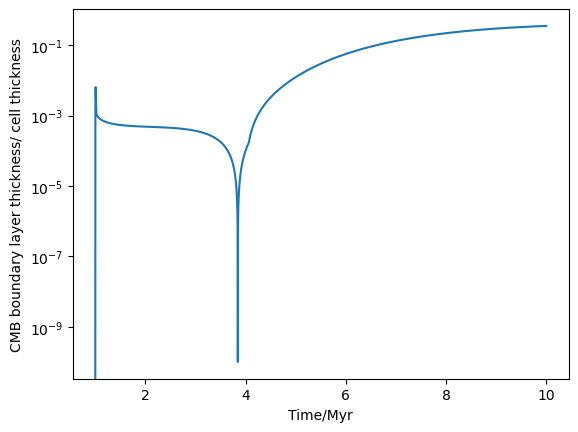

In [11]:
plt.figure()

if conduction == True:
    plt.plot(t_plot[:cond_i],2*dl[:cond_i]/dr)
    #plt.hlines(1,min(t_plot),max(t_plot[:cond_i]),color='k',linestyle='--')
    plt.xlim([xmin,t_plot[cond_i]])
else:
    plt.semilogy(t_plot,2*dl/dr)
plt.xlabel('Time/Myr')
plt.ylabel('CMB boundary layer thickness/ cell thickness')
if save == True:
    plt.savefig('Plots/run_{}_cmb_thickness.png'.format(run))


## Sulfur fraction in liquid part of core <a class="anchor" id="sulfur"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

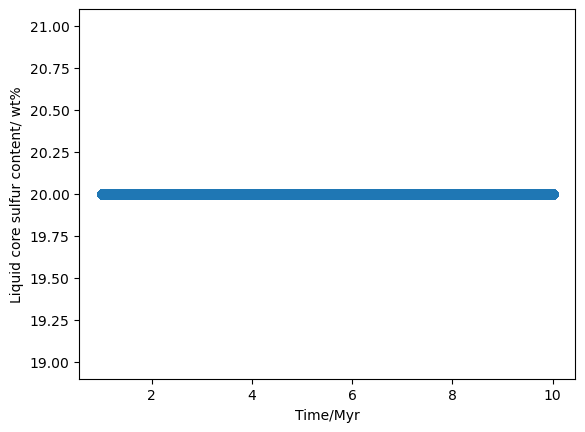

In [12]:
plt.figure()
#plt.loglog(t_plot,Xs)
plt.scatter(t_plot,Xs)
#plt.xlim([297.5,299.5])
#plt.xlim([xmin,max(t_plot)])
plt.xlabel('Time/Myr')
plt.ylabel('Liquid core sulfur content/ wt%')

if save == True:
    plt.savefig('Plots/run_{}_sulfur.png'.format(run))

## Initial temperature profiles <a class="anchor" id="Tprofile-initial"></a>
<p align="right">(<a href="#top">back to top</a>)</p>
I don't think the legend here is quite right.

In [13]:
dr

500

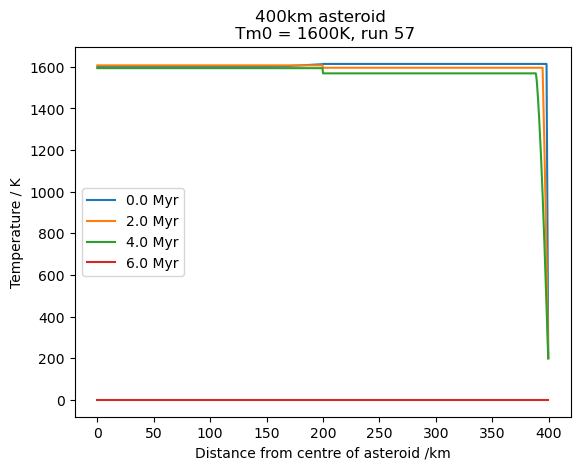

In [14]:
plt.figure()
rplot= np.arange(0,r,dr)
for i in range(4):
    plt.plot(rplot/1e3, T_profile[i,:],label=f'{(1+i*dt)/Myr:.1f} Myr') #approximate temp profile times
plt.xlabel('Distance from centre of asteroid /km')
plt.ylabel('Temperature / K')
plt.title('{:.0f}km asteroid \n Tm0 = {}K, run {}'.format(r/1e3, Tm0, run))
plt.legend()
if save == True:
    plt.savefig('Plots/run_{}_initial_temp.png'.format(run))

## Temperature profiles across whole simulation <a class="anchor" id="Tprofile-time"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

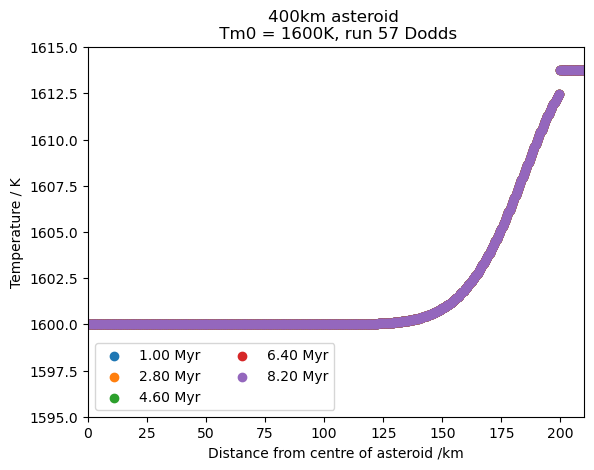

In [15]:
plt.figure()
rplot= np.arange(0,r,dr)
n = np.shape(T_profile)[0]
l = len(t_plot)
n_plot = 5 #how many plots do you want
for i in range(n_plot):
#for i in range(15):
    plt.scatter(rplot/1e3, T_profile[i*int(n/n_plot),:],label='{:.2f} Myr'.format(t_plot[i*int(l/n_plot)])) #approximate temp profile times
plt.xlabel('Distance from centre of asteroid /km')
plt.ylabel('Temperature / K')
plt.title(f'{r/1e3:.0f}km asteroid \n Tm0 = {Tm0}K, run {run} {viscosity}')
plt.legend(ncol=2,loc='lower left')
#plt.vlines(2,ymin=1590,ymax=1625,linestyle='--',color='black')
plt.xlim([0,210])
#plt.xlim([0,25])
plt.ylim([1595,1615])
if save == True:
    plt.savefig('Plots/run{}_Tprofile.png'.format(run))

The labels on this legend are wrong